In [1]:
import tensorflow as tf

В Tensorflow все представлено в виде графа, где узлы это tf.Operation (операции), а грани tf.Tensor (тензоры).
Операции выполняют расчеты, принимают и дают на выход тензоры.

[`tf.Session`](https://www.tensorflow.org/api_docs/python/tf/Session) - среда выполнения графа.

In [2]:
hello = tf.constant('Hello, world!')

[`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant) создает тензор типа Const.

In [3]:
print(hello)

Tensor("Const:0", shape=(), dtype=string)


Для исполнения графа требуется tf.Session, который служит средой выполнения.

In [4]:
session = tf.Session()

In [5]:
session.run(hello)

b'Hello, world!'

В `run()` можно передавать несколько тензоров. Это могут быть как tuples так и dicts.

In [6]:
session.run({'hello': hello})

{'hello': b'Hello, world!'}

Можно задавать переменную, чье значение будет передано или расчитано потом.

Для этого используется [`tf.placeholder()`](https://www.tensorflow.org/api_docs/python/tf/placeholder)

Создаваемое значение должно быть передано в `feed_dict` объекта `Session`.

In [7]:
hello_placeholder = tf.placeholder(tf.string)
session.run(hello_placeholder, feed_dict={hello_placeholder: 'Hello world'})

array('Hello world', dtype=object)

## Variable

[Документация по переменным](https://www.tensorflow.org/guide/variables)

[`tf.Variable`](https://www.tensorflow.org/api_docs/python/tf/Variable) - изменяемый тензор, которые живет вне сессии.

Перед использованием, переменные требуется инициализировать.

In [8]:
hello_variable = tf.Variable("Hello, world!", tf.string)

session.run(tf.global_variables_initializer())
session.run(hello_variable)

Instructions for updating:
Colocations handled automatically by placer.


b'Hello, world!'

Чтобы получить список неинициализированных переменных

In [9]:
another_variable = tf.Variable(11, tf.int32)
session.run(tf.report_uninitialized_variables())

array([b'Variable_1'], dtype=object)

Переменные можно индивидуально инициализировать

In [10]:
session.run(another_variable.initial_value)

11

Именованная переменная

In [11]:
hello_var_array = tf.get_variable("hello_variable", [1, 2, 3])
session.run(hello_var_array.initial_value)

array([[[-0.43161303,  0.9765885 ,  0.4019227 ],
        [-0.32729942,  0.930274  ,  0.59296894]]], dtype=float32)

## Функции рандома

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 

n = 500000

[`tf.random.uniform()`](https://www.tensorflow.org/api_docs/python/tf/random/uniform)

Тензор из рандомных значений. По дефолту значения от 0 до 1.

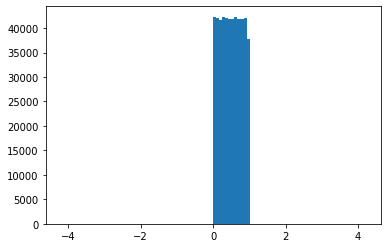

In [13]:
random_uniform_vec = tf.random_uniform(shape=(n,))
random_uniform_result = session.run(random_uniform_vec)

plt.hist(random_uniform_result, 100, (-4.2, 4.2));

[`tf.random.normal`](https://www.tensorflow.org/api_docs/python/tf/random/normal)

Тензор нормального распределения.

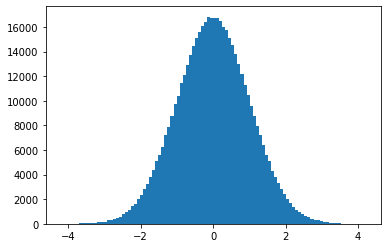

In [14]:
random_normal_vec = tf.random_normal(shape=(n,))
random_normal_result = session.run(random_normal_vec)

plt.hist(random_normal_result, 100, (-4.2, 4.2));

[`tf.random.truncated_normal`](https://www.tensorflow.org/api_docs/python/tf/random/truncated_normal)

Тензор с нормальным распределением, но с выкидыванием части значений.

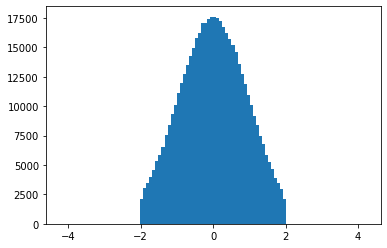

In [15]:
random_truncated_normal_vec = tf.truncated_normal(shape=(n,))
random_truncated_normal_result = session.run(random_truncated_normal_vec)

plt.hist(random_truncated_normal_result, 100, (-4.2, 4.2));

## Другие

[`tf.zeros`](https://www.tensorflow.org/api_docs/python/tf/zeros)

Тензор, состоящий из нулей. По дефолту float32.

In [16]:
zeros_matrix = tf.zeros([2, 3], tf.int32)
session.run(zeros_matrix)

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)